In [2]:
import pandas as pd
from plotnine import *
import re

import sys
sys.path.insert(0, '../CODE/')
from visualization_utils import COLORS

# Hyperparameter tuning:
- Randomly chose 10% of the TFs for tuning and 90% for downstream cross validation
- The parameters being tuned:
   1. Learning rate
   2. Leaf paritioning regularizer
   3. Subsampling rate
- The max number of tuning iteration is set to 100
- The following results show the cross-TF validaiton on the 90% holdout TFs

# Yeast calling cards

In [24]:
tun_df = pd.read_csv('../OUTPUT/yeast_cc_hp_tun/stats.csv.gz')
tun_df['tuning'] = 'True'

base_df = pd.read_csv('../OUTPUT/yeast_cc_hp_base/stats.csv.gz')
base_df['tuning'] = 'False'

orig_df = pd.read_csv('../OUTPUT/yeast_cc/stats.csv.gz')
orig_df['tuning'] = 'Orig'
orig_df = orig_df[orig_df['tf'].isin(base_df['tf'])]

df = pd.concat([tun_df, base_df, orig_df])

df2 = tun_df.merge(base_df, on=['cv', 'tf'])
df2['improv_auc'] = df2['auprc_x'] - df2['auprc_y']
df2['improv_frac'] = df2['improv_auc'] / df2['auprc_y']

# Sort TFs by baseline AUPRC
df['tf'] = pd.Categorical(
    df['tf'], ordered=True,
    categories=base_df.sort_values('auprc')['tf'].values
)

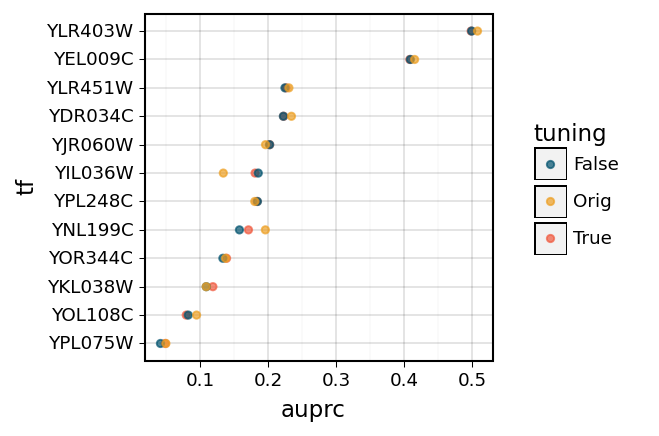

<ggplot: (2946179100729)>

In [25]:
(
    ggplot(df, aes(x='auprc', y='tf', color='tuning'))
    + geom_point(alpha=.7)
    + scale_color_manual([COLORS['dark_blue'], COLORS['yellow'], COLORS['orange']])
    + theme_linedraw()
    + theme(figure_size=(3, 3), dpi=150)
)

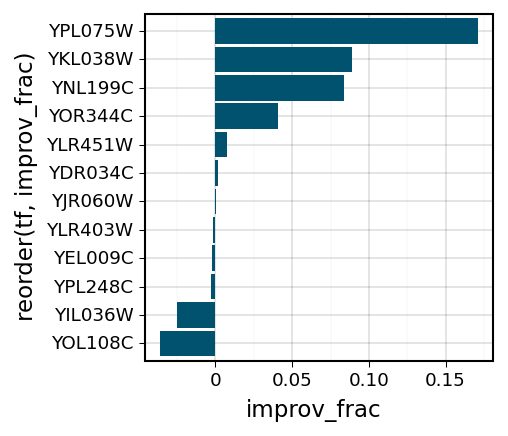

<ggplot: (-9223369098139632675)>

In [152]:
(
    ggplot(df2, aes(x='reorder(tf, improv_frac)', y='improv_frac'))
    + geom_bar(stat='identity', fill=COLORS['dark_blue'])
    + coord_flip()
    + theme_linedraw()
    + theme(figure_size=(3, 3), dpi=150)
)

In [153]:
tun_df = pd.read_csv('../OUTPUT/yeast_cc_hp_tun_2morehps/stats.csv.gz')
tun_df['tuning'] = 'True'

base_df = pd.read_csv('../OUTPUT/yeast_cc_hp_base/stats.csv.gz')
base_df['tuning'] = 'False'

df = pd.concat([tun_df, base_df])

df2 = tun_df.merge(base_df, on=['cv', 'tf'])
df2['improv_auc'] = df2['auprc_x'] - df2['auprc_y']
df2['improv_frac'] = df2['improv_auc'] / df2['auprc_y']

# Sort TFs by baseline AUPRC
df['tf'] = pd.Categorical(
    df['tf'], ordered=True,
    categories=base_df.sort_values('auprc')['tf'].values
)

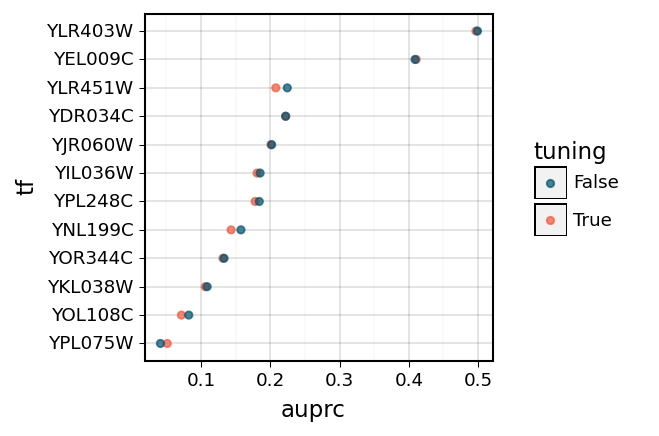

<ggplot: (-9223369098139683945)>

In [154]:
(
    ggplot(df, aes(x='auprc', y='tf', color='tuning'))
    + geom_point(alpha=.7)
    + scale_color_manual([COLORS['dark_blue'], COLORS['orange']])
    + theme_linedraw()
    + theme(figure_size=(3, 3), dpi=150)
)

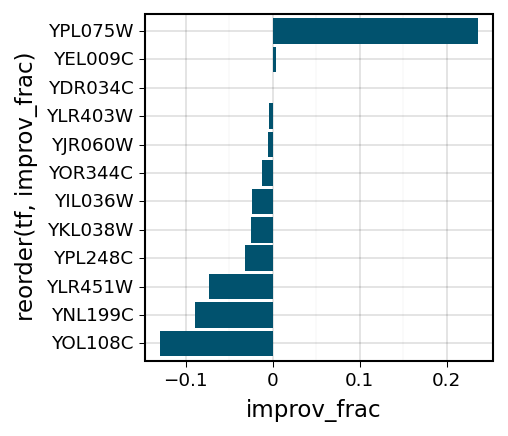

<ggplot: (-9223369098139684029)>

In [155]:
(
    ggplot(df2, aes(x='reorder(tf, improv_frac)', y='improv_frac'))
    + geom_bar(stat='identity', fill=COLORS['dark_blue'])
    + coord_flip()
    + theme_linedraw()
    + theme(figure_size=(3, 3), dpi=150)
)

In [115]:
# (
#     ggplot(df2, aes(x='auprc_y', y='improv_frac'))
#     + geom_point(color=COLORS['dark_blue'])
#     + geom_smooth(method='lm', color=COLORS['orange'], fill=COLORS['orange'], alpha=.1)
#     + labs(x='auprc (no tun)')
#     + theme_linedraw()
#     + theme(figure_size=(3, 3), dpi=150)
# )

# Yeast ChIP-exo

In [30]:
tun_df = pd.read_csv('../OUTPUT/yeast_chipexo_hp_tun/stats.csv.gz')
tun_df['tuning'] = 'True'

base_df = pd.read_csv('../OUTPUT/yeast_chipexo_hp_base/stats.csv.gz')
base_df['tuning'] = 'False'

orig_df = pd.read_csv('../OUTPUT/yeast_chipexo/stats.csv.gz')
orig_df['tuning'] = 'Orig'
orig_df = orig_df[orig_df['tf'].isin(base_df['tf'])]

df = pd.concat([tun_df, base_df, orig_df])

df2 = tun_df.merge(base_df, on=['cv', 'tf'])
df2['improv_auc'] = df2['auprc_x'] - df2['auprc_y']
df2['improv_frac'] = df2['improv_auc'] / df2['auprc_y']

# Sort TFs by baseline AUPRC
df['tf'] = pd.Categorical(
    df['tf'], ordered=True,
    categories=base_df.sort_values('auprc')['tf'].values
)

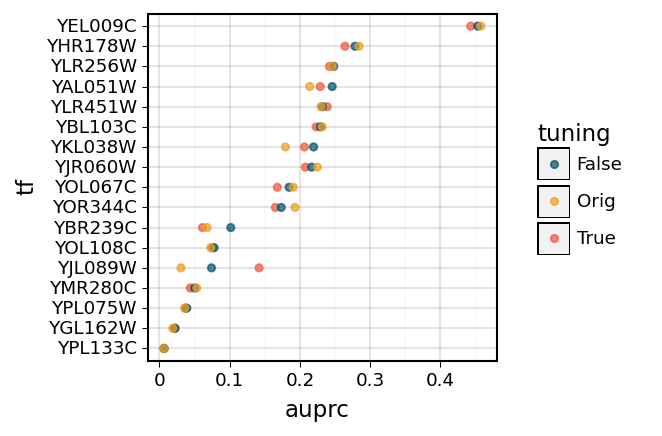

<ggplot: (-9223369090675546592)>

In [31]:
(
    ggplot(df, aes(x='auprc', y='tf', color='tuning'))
    + geom_point(alpha=.7)
    + scale_color_manual([COLORS['dark_blue'], COLORS['yellow'], COLORS['orange']])
    + theme_linedraw()
    + theme(figure_size=(3, 3), dpi=150)
)

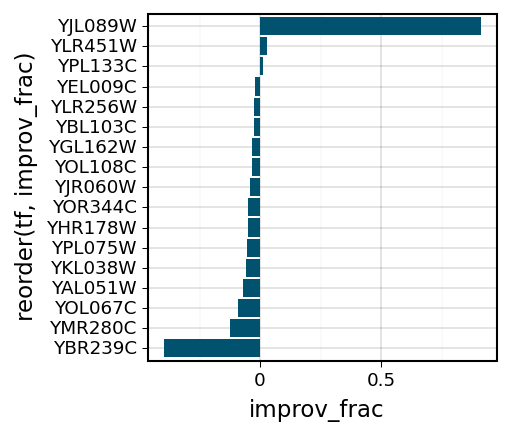

<ggplot: (2946179100792)>

In [32]:
(
    ggplot(df2, aes(x='reorder(tf, improv_frac)', y='improv_frac'))
    + geom_bar(stat='identity', fill=COLORS['dark_blue'])
    + coord_flip()
    + theme_linedraw()
    + theme(figure_size=(3, 3), dpi=150)
)

In [147]:
tun_df = pd.read_csv('../OUTPUT/yeast_chipexo_hp_tun_2morehps/stats.csv.gz')
tun_df['tuning'] = 'True'

base_df = pd.read_csv('../OUTPUT/yeast_chipexo_hp_base/stats.csv.gz')
base_df['tuning'] = 'False'

df = pd.concat([tun_df, base_df])

df2 = tun_df.merge(base_df, on=['cv', 'tf'])
df2['improv_auc'] = df2['auprc_x'] - df2['auprc_y']
df2['improv_frac'] = df2['improv_auc'] / df2['auprc_y']

# Sort TFs by baseline AUPRC
df['tf'] = pd.Categorical(
    df['tf'], ordered=True,
    categories=base_df.sort_values('auprc')['tf'].values
)

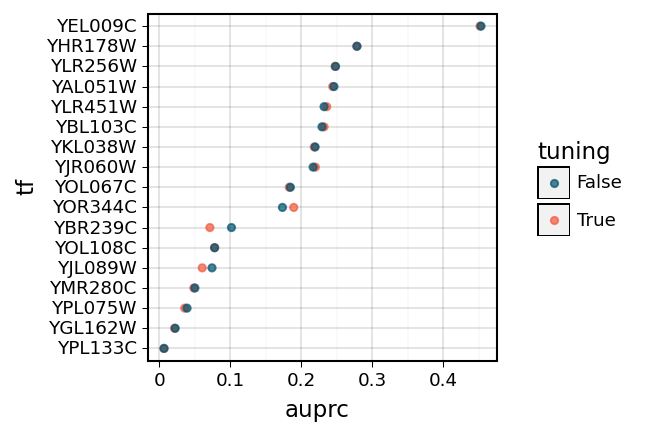

<ggplot: (-9223369098139775428)>

In [148]:
(
    ggplot(df, aes(x='auprc', y='tf', color='tuning'))
    + geom_point(alpha=.7)
    + scale_color_manual([COLORS['dark_blue'], COLORS['orange']])
    + theme_linedraw()
    + theme(figure_size=(3, 3), dpi=150)
)

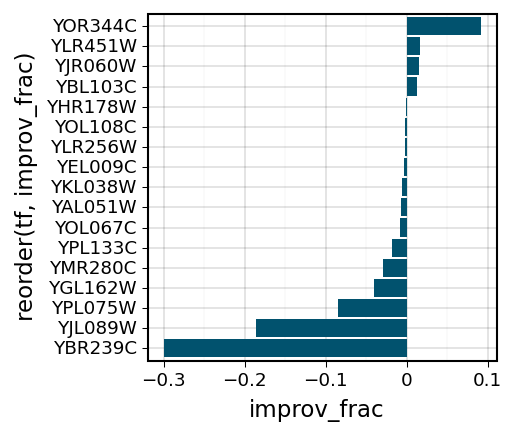

<ggplot: (-9223369098139703036)>

In [149]:
(
    ggplot(df2, aes(x='reorder(tf, improv_frac)', y='improv_frac'))
    + geom_bar(stat='identity', fill=COLORS['dark_blue'])
    + coord_flip()
    + theme_linedraw()
    + theme(figure_size=(3, 3), dpi=150)
)

# Human - H1

In [14]:
tun_df = pd.read_csv('../OUTPUT/human_h1_hp_tun/stats.csv.gz')
tun_df['tuning'] = 'True'

base_df = pd.read_csv('../OUTPUT/human_h1_hp_base/stats.csv.gz')
base_df['tuning'] = 'False'

orig_df = pd.read_csv('../OUTPUT/archive/human_h1_woo/stats.csv.gz')
orig_df['tuning'] = 'Orig'
orig_df = orig_df[orig_df['tf'].isin(base_df['tf'])]

In [15]:
df = pd.concat([tun_df, base_df, orig_df])

df2 = tun_df.merge(base_df, on=['tf'])
df2['improv_frac'] = (df2['auprc_x'] - df2['auprc_y']) / df2['auprc_y']

# Sort TFs by baseline AUPRC
df['tf'] = pd.Categorical(
    df['tf'], ordered=True,
    categories=base_df.sort_values('auprc')['tf'].values
)

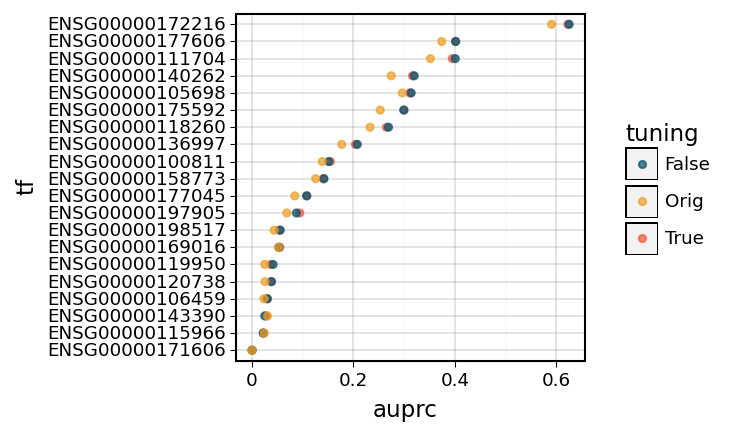

<ggplot: (-9223369090676862327)>

In [17]:
(
    ggplot(df, aes(x='auprc', y='tf', color='tuning'))
    + geom_point(alpha=.7)
    + scale_color_manual([COLORS['dark_blue'], COLORS['yellow'], COLORS['orange']])
    + theme_linedraw()
    + theme(figure_size=(3, 3), dpi=150)
)

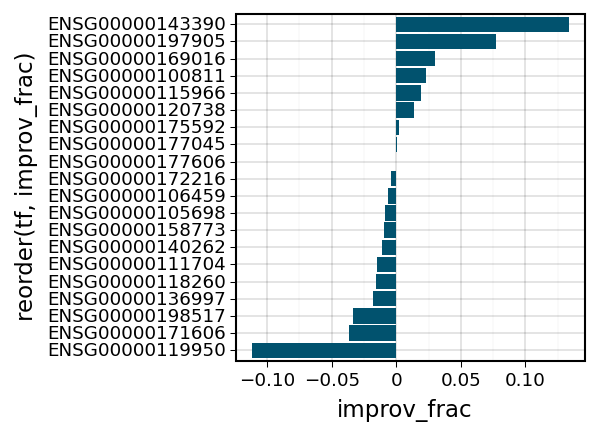

<ggplot: (-9223370627597805673)>

In [8]:
df2 = df2.sort_values('improv_frac')

(
    ggplot(df2, aes(x='reorder(tf, improv_frac)', y='improv_frac'))
    + geom_bar(stat='identity', fill=COLORS['dark_blue'])
    + coord_flip()
    + theme_linedraw()
    + theme(figure_size=(3, 3), dpi=150)
)